In [93]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import pandas as pd

utils.create_output_dir("project")

'results/project'

In [94]:
def read_file(filename):
    data = pd.read_csv(filename, sep=",\s*", engine="python", comment="#")

    # Read first line to get the problem size, and print it
    with open(filename, "r") as f:
        first_line = f.readline()
    print(first_line)
    # Match the "n = 20000000" part of the string
    n = int(first_line.split(",")[0].split("n = ")[1].split(" ")[0])
    p = int(first_line.split(",")[1].split("p = ")[1].split(" ")[0])
    lam = float(first_line.split(",")[2].split("lam = ")[1].split(" ")[0])
    print(f"Problem size: {n}")
    print(f"Number of processors: {p}")
    print(f"Lambda: {lam}")

    return data, {"n": n, "p": p, "lam": lam}

# Plot how the time to solution varies with the number of processors on 4 nodes

In [95]:
filename = "results/project/mpi_problem_3_quad_combined.txt"
data, params = read_file(filename)
n = params["n"]
p = params["p"]
lam = params["lam"]

# n = 20000000, p = 100, lam = 0.01, rho = 1, max_iter = 1000, tol = 1e-10

Problem size: 20000000
Number of processors: 100
Lambda: 0.01


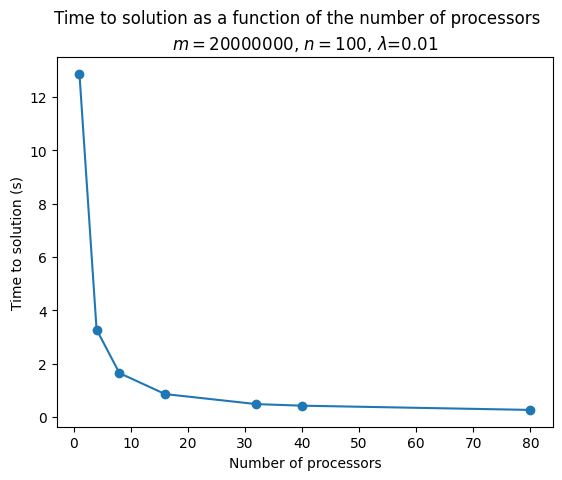

In [96]:
# Plot the time to solution as a function of the number of processors
plt.figure()
plt.plot(data["size"], data["time"], "o-")
plt.xlabel("Number of processors")
plt.ylabel("Time to solution (s)")
plt.suptitle("Time to solution as a function of the number of processors")
plt.title(f"$m={n}$, $n={p}$, $\lambda$={lam}")

fig_path = utils.get_file_path("quad_node_time_to_solution_vs_processors.pdf")
plt.savefig(fig_path, bbox_inches="tight")

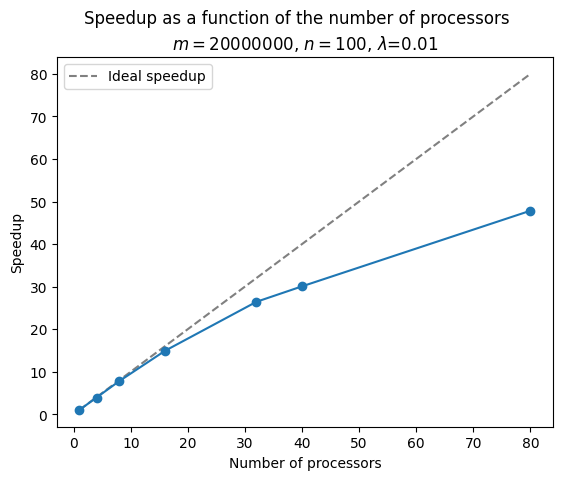

In [97]:
# Compute the speedup
data["speedup"] = data["time"][0] / data["time"]

# Plot the speedup as a function of the number of processors
plt.figure()
# Plot the ideal speedup
plt.plot(data["size"], data["size"], "--", color="gray", label="Ideal speedup")
plt.plot(data["size"], data["speedup"], "o-")
plt.xlabel("Number of processors")
plt.ylabel("Speedup")
plt.suptitle("Speedup as a function of the number of processors")
plt.title(f"$m={n}$, $n={p}$, $\lambda$={lam}")
plt.legend()

fig_path = utils.get_file_path("quad_node_speedup_vs_processors.pdf")
plt.savefig(fig_path, bbox_inches="tight")


# Plot how the time to solution varies with the problem size on a single node

In [98]:
filename = "results/project/mpi_problem_3_single_node_combined.txt"
data, params = read_file(filename)
n = params["n"]
p = params["p"]
lam = params["lam"]

# n = 10000000, p = 100, lam = 0.01, rho = 1, max_iter = 1000, tol = 1e-10

Problem size: 10000000
Number of processors: 100
Lambda: 0.01


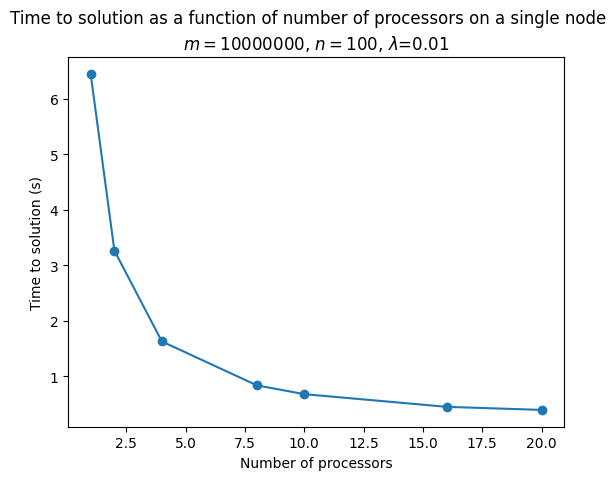

In [99]:
# Plot the time to solution as a function of the number of processors
plt.figure()
plt.plot(data["size"], data["time"], "o-")
plt.xlabel("Number of processors")
plt.ylabel("Time to solution (s)")
plt.suptitle("Time to solution as a function of number of processors on a single node")
plt.title(f"$m={n}$, $n={p}$, $\lambda$={lam}")

fig_path = utils.get_file_path("single_node_time_to_solution_vs_problem_size.pdf")
plt.savefig(fig_path, bbox_inches="tight")

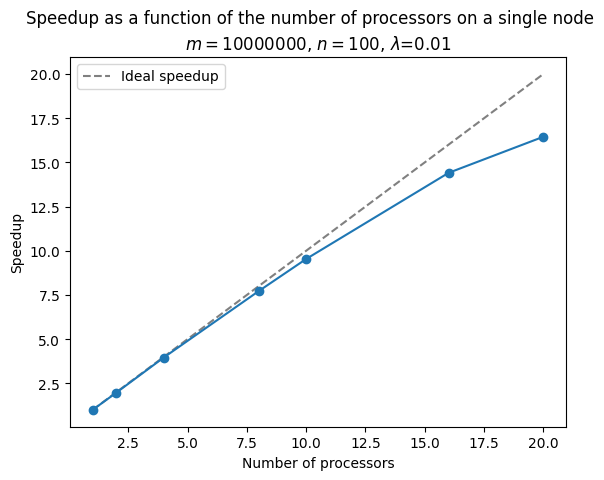

In [100]:
# Compute the speedup
data["speedup"] = data["time"][0] / data["time"]

# Plot the speedup as a function of the number of processors
plt.figure()
# Plot the ideal speedup
plt.plot(data["size"], data["size"], "--", color="gray", label="Ideal speedup")
plt.plot(data["size"], data["speedup"], "o-")
plt.xlabel("Number of processors")
plt.ylabel("Speedup")
plt.suptitle("Speedup as a function of the number of processors on a single node")
plt.title(f"$m={n}$, $n={p}$, $\lambda$={lam}")
plt.legend()

fig_path = utils.get_file_path("single_node_speedup_vs_problem_size.pdf")
plt.savefig(fig_path, bbox_inches="tight")


# Plot error as amount of data increases

In [101]:
filename = "results/project/mpi_problem_2_combined.txt"
data, params = read_file(filename)
n = params["n"]
p = params["p"]
lam = params["lam"]

# n = 10000000, p = 100, lam = 0.01, rho = 1, max_iter = 1000, tol = 1e-10

Problem size: 10000000
Number of processors: 100
Lambda: 0.01


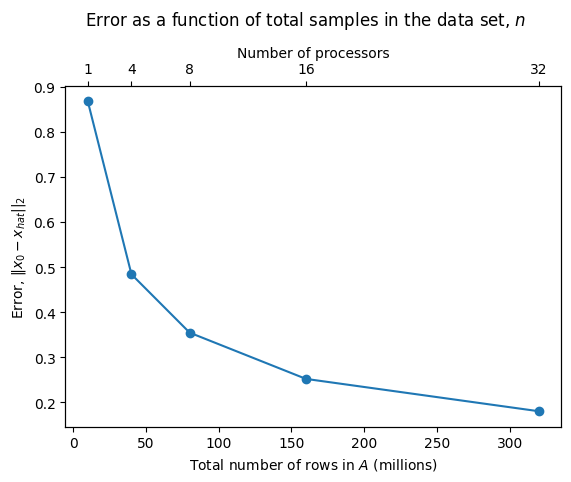

In [102]:
# Compute the total number of elements
data["total_m"] = data["size"] * data["average_m"]
# Convert to millions
data["total_m"] = data["total_m"] / 1e6

# Plot the error as a function of total number of elements
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data["total_m"], data["error"], "o-")
ax1.set_xlabel("Total number of rows in $A$ (millions)")
ax1.set_ylabel("Error, $\| x_0 - x_{hat} ||_2$")
#plt.suptitle("Error as a function of total samples in the data set, $n$")
#plt.title(f"p={p}, $\lambda$={lam}")

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(data["total_m"])
ax2.set_xticklabels(data["size"])
ax2.set_xlabel("Number of processors")

# Create title above both subplots
# add space between suptitle and subplots
fig.subplots_adjust(top=0.82)
fig.suptitle("Error as a function of total samples in the data set, $n$")

fig_path = utils.get_file_path("dual_node_error_vs_total_samples.pdf")
plt.savefig(fig_path, bbox_inches="tight")

# Weak scaling for dual nodes

In [103]:
filename = "results/project/mpi_problem_2_combined.txt"
data, params = read_file(filename)
n = params["n"]
p = params["p"]
lam = params["lam"]


# n = 10000000, p = 100, lam = 0.01, rho = 1, max_iter = 1000, tol = 1e-10

Problem size: 10000000
Number of processors: 100
Lambda: 0.01


In [104]:
# Compute the total number of elements
data["total_m"] = data["size"] * data["average_m"]
# Convert to millions
data["total_m"] = data["total_m"] / 1e6

# Compute the weak scaling efficiency
data["weak_scaling"] = data["time"][0] / (data["time"])

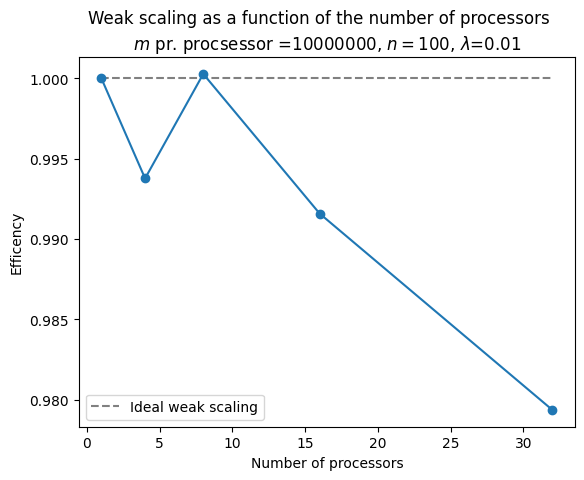

In [105]:
# Plot the weak scaling as a function number of processors (size)
plt.figure()
# Plot the ideal weak scaling
plt.plot(data["size"], np.ones_like(data["size"]), "--", color="gray", label="Ideal weak scaling")
plt.plot(data["size"], data["weak_scaling"], "o-")
plt.xlabel("Number of processors")
plt.ylabel("Efficency")
plt.suptitle("Weak scaling as a function of the number of processors")
plt.title(f"$m$ pr. procsessor ={n}, $n={p}$, $\lambda$={lam}")
plt.legend()

fig_path = utils.get_file_path("dual_node_weak_scaling_vs_processors.pdf")
plt.savefig(fig_path, bbox_inches="tight")

